# Prelude

In [1]:
# Operate on project's root dir
%cd -q ..

Using a command line option, generate all weapons in the game and save it to a CSV file.

In [2]:
# Note that the game operates on assets directory.
!./gradlew lwjgl3:run --args="all-weapons ../all.csv"



> Starting Daemon> IDLE<-------------> 0% INITIALIZING s]<-------------> 0% INITIALIZING s]<-------------> 0% INITIALIZING s]<-------------> 0% INITIALIZING s]> Evaluating settings<-------------> 0% INITIALIZING s]<-------------> 0% INITIALIZING s]<-------------> 0% INITIALIZING s]<-------------> 0% INITIALIZING s]<-------------> 0% INITIALIZING s]<-------------> 0% INITIALIZING s]> Evaluating settings > Resolve dependencies of detachedConfiguration1<-------------> 0% INITIALIZING [1s]> Evaluating settings> Evaluating settings > Resolve files of configuration 'classpath'> IDLE<-------------> 0% CONFIGURING [1s]> root project> root project > Resolve dependencies of classpath> root project > Resolve files of configuration 'classpath'> root project<-------------> 0% CONFIGURING [2s]<==-----------> 20% CONFIGURING [2s]> :android<==-----------> 20% CONFIGURING [3s]<=======------> 60% CONFIGURING [3s]> :html<=======------> 60% CONFIGURING [4s]<==========---> 80% CONFIGURING [4s]> :lwjgl3<=

We have created `all.csv`, which contains all weapons in the game.

In [3]:
!ls *.csv

all.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

plt.style.use('dark_background')

# Read & Process Data

In [5]:
# Read the CSV file
df = pd.read_csv('all.csv')

df.columns.values

array(['HashName', 'P', 'DPS', 'Acc1', 'Acc5', 'Acc10', 'Acc15', 'Acc25'],
      dtype=object)

In [6]:
# Compute effective DPS for various distances
for i in [1, 5, 10, 15, 25]:
    df[f"DPS{i}"] = df["DPS"] * df[f"Acc{i}"]

In [7]:
# Separate rifles & pistols
rifles = df[~df['HashName'].str.contains('Pistol', na=False)]
pistols = df[df['HashName'].str.contains('Pistol', na=False)]

# DPS Distribution for a given distance

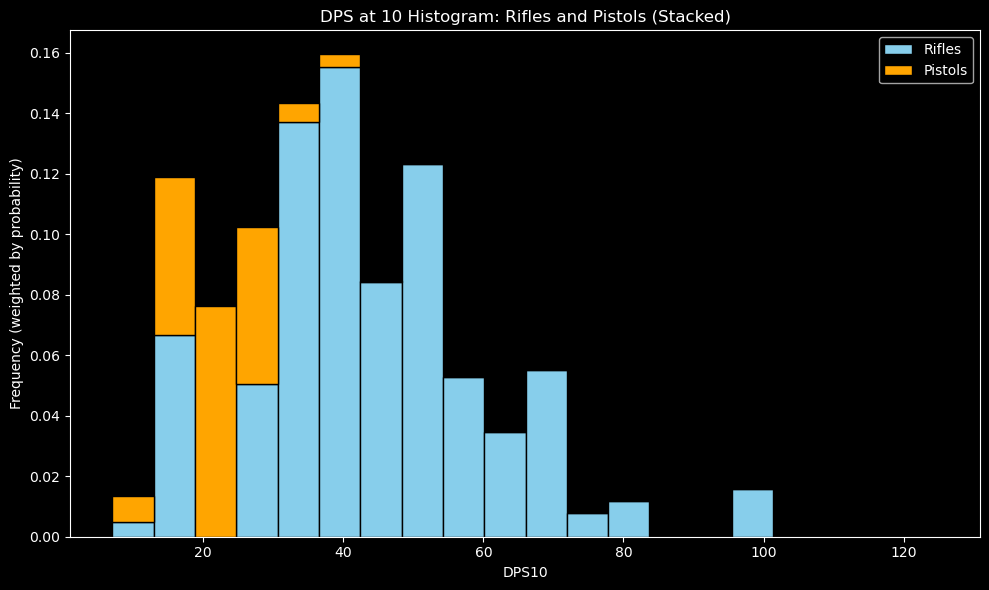

In [8]:
distance = 10

key = f"DPS{distance}"
# Set number of bins and common bin edges
bins = 20
all_dps = pd.concat([rifles[key], pistols[key]])
bin_edges = pd.cut(all_dps, bins=bins, retbins=True)[1]

# Plot rifles histogram
plt.figure(figsize=(10, 6))
plt.hist(
    rifles[key], 
    bins=bin_edges, 
    weights=rifles['P'], 
    label='Rifles', 
    color='skyblue', 
    edgecolor='black'
)

# Plot pistols histogram on top
plt.hist(
    pistols[key], 
    bins=bin_edges, 
    weights=pistols['P'], 
    label='Pistols', 
    color='orange', 
    edgecolor='black',
    bottom=np.histogram(rifles[key], bins=bin_edges, weights=rifles['P'])[0]
)

# Labels and legend
plt.xlabel(key)
plt.ylabel('Frequency (weighted by probability)')
plt.title(f'DPS at {distance} Histogram: Rifles and Pistols (Stacked)')
plt.legend()
plt.tight_layout()

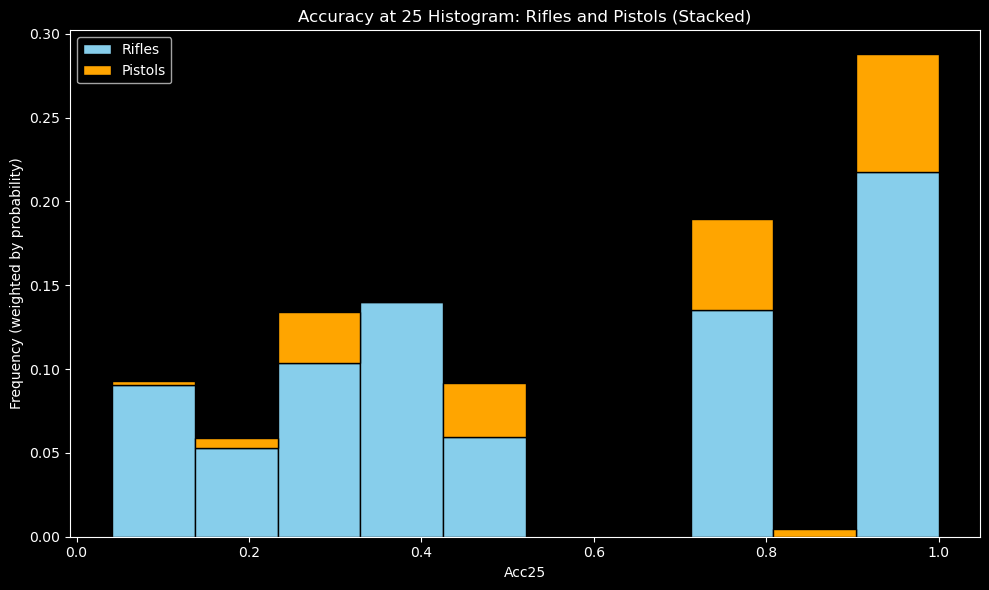

In [9]:
distance = 25

key = f"Acc{distance}"
# Set number of bins and common bin edges
bins = 10
all_dps = pd.concat([rifles[key], pistols[key]])
bin_edges = pd.cut(all_dps, bins=bins, retbins=True)[1]

# Plot rifles histogram
plt.figure(figsize=(10, 6))
plt.hist(
    rifles[key], 
    bins=bin_edges, 
    weights=rifles['P'], 
    label='Rifles', 
    color='skyblue', 
    edgecolor='black'
)

# Plot pistols histogram on top
plt.hist(
    pistols[key], 
    bins=bin_edges, 
    weights=pistols['P'], 
    label='Pistols', 
    color='orange', 
    edgecolor='black',
    bottom=np.histogram(rifles[key], bins=bin_edges, weights=rifles['P'])[0]
)

# Labels and legend
plt.xlabel(key)
plt.ylabel('Frequency (weighted by probability)')
plt.title(f'Accuracy at {distance} Histogram: Rifles and Pistols (Stacked)')
plt.legend()
plt.tight_layout()

## Top 10 Weapons for the given Distance

1. Double-burst-fire pistol is surprisingly good.
2. Overclocked + Longbarrel combination is the best for rifles.

In [10]:
sorted_df = df.sort_values(by=f'DPS{distance}', ascending=False)
sorted_df.head(10)

,HashName,P,DPS,Acc1,Acc5,Acc10,Acc15,Acc25,DPS1,DPS5,DPS10,DPS15,DPS25
2293,Pistol SpeedloaderMag BurstFire BurstFire,0.000360,125.0,1.0,1.0,1.0,1.0,1.0,125.0,125.0,125.0,125.0,125.0
698,AK SpeedloaderMag Woodstock Overclocked LongBa...,0.000423,96.2,1.0,1.0,1.0,1.0,1.0,96.2,96.2,96.2,96.2,96.2
400,AK ExtendedMag Woodstock LongBarrel Overclocked,0.000423,96.2,1.0,1.0,1.0,1.0,1.0,96.2,96.2,96.2,96.2,96.2
222,AK NormalStock LongBarrel Overclocked,0.000705,96.2,1.0,1.0,1.0,1.0,1.0,96.2,96.2,96.2,96.2,96.2
1735,M4A1 SpeedloaderMag Woodstock LongBarrel Overc...,0.000423,96.2,1.0,1.0,1.0,1.0,1.0,96.2,96.2,96.2,96.2,96.2
787,AK SpeedloaderMag NormalStock Overclocked Long...,0.000423,96.2,1.0,1.0,1.0,1.0,1.0,96.2,96.2,96.2,96.2,96.2
1766,M4A1 SpeedloaderMag Woodstock Overclocked Long...,0.000423,96.2,1.0,1.0,1.0,1.0,1.0,96.2,96.2,96.2,96.2,96.2
1379,M4A1 ExtendedMag LongBarrel Overclocked,0.000094,96.2,1.0,1.0,1.0,1.0,1.0,96.2,96.2,96.2,96.2,96.2
1112,M4A1 LongBarrel Overclocked,0.000157,96.2,1.0,1.0,1.0,1.0,1.0,96.2,96.2,96.2,96.2,96.2
431,AK ExtendedMag Woodstock Overclocked LongBarrel,0.000423,96.2,1.0,1.0,1.0,1.0,1.0,96.2,96.2,96.2,96.2,96.2


# How DPS changes as distance increases

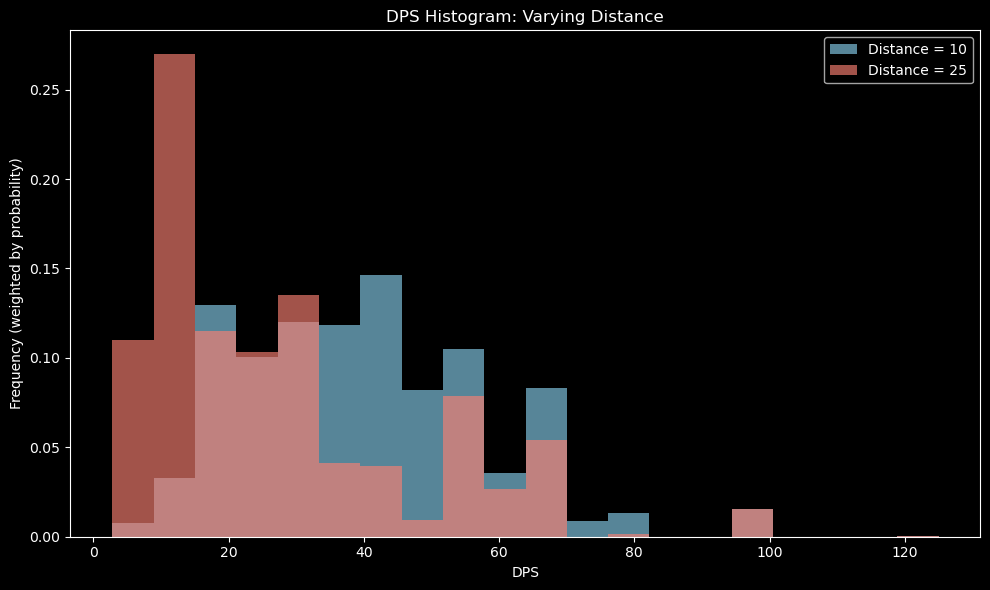

In [19]:
distance = 10

# Set number of bins and common bin edges
bins = 20
all_dps = pd.concat([df["DPS10"], df["DPS25"]])
bin_edges = pd.cut(all_dps, bins=bins, retbins=True)[1]

# Plot rifles histogram
plt.figure(figsize=(10, 6))
distance = 10
plt.hist(
    df[f"DPS{distance}"], 
    bins=bin_edges, 
    weights=df['P'], 
    label=f'Distance = {distance}', 
    color='skyblue', 
    alpha=0.65  # Make transparent
)

distance = 25
plt.hist(
    df[f"DPS{distance}"], 
    bins=bin_edges, 
    weights=df['P'], 
    label=f'Distance = {distance}', 
    color='salmon', 
    alpha=0.65  # Make transparent
)

# Labels and legend
plt.xlabel(key)
plt.ylabel('Frequency (weighted by probability)')
plt.title(f'DPS Histogram: Varying Distance')
plt.legend()
plt.tight_layout()

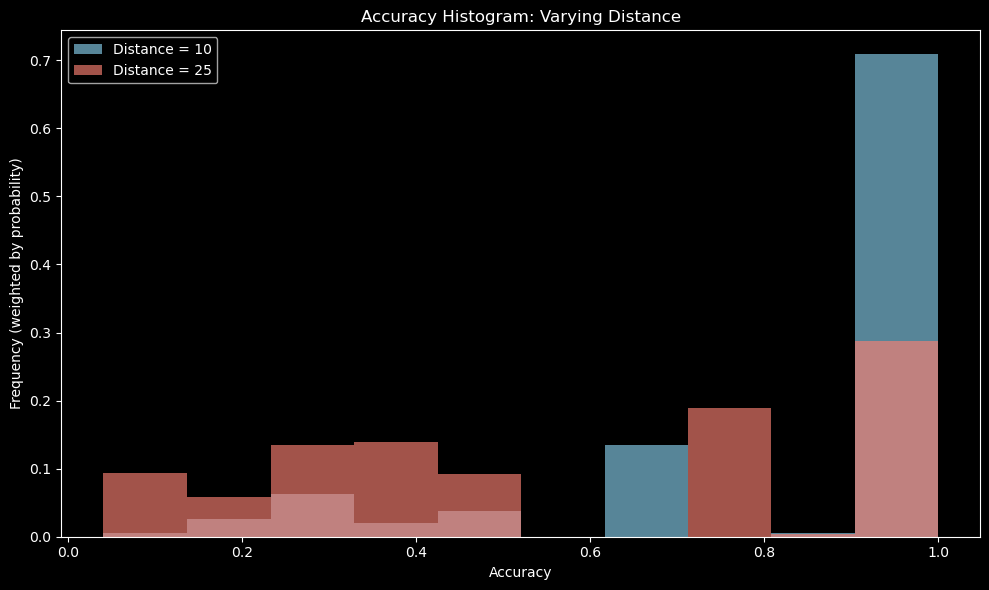

In [38]:
distance = 10

# Set number of bins and common bin edges
bins = 10
all_dps = pd.concat([df["Acc10"], df["Acc25"]])
bin_edges = pd.cut(all_dps, bins=bins, retbins=True)[1]

# Plot rifles histogram
plt.figure(figsize=(10, 6))
distance = 10
plt.hist(
    df[f"Acc{distance}"], 
    bins=bin_edges, 
    weights=df['P'], 
    label=f'Distance = {distance}', 
    color='skyblue', 
    alpha=0.65  # Make transparent
)

distance = 25
plt.hist(
    df[f"Acc{distance}"], 
    bins=bin_edges, 
    weights=df['P'], 
    label=f'Distance = {distance}', 
    color='salmon', 
    alpha=0.65  # Make transparent
)

# Labels and legend
plt.xlabel("Accuracy")
plt.ylabel('Frequency (weighted by probability)')
plt.title(f'Accuracy Histogram: Varying Distance')
plt.legend()
plt.tight_layout()

# Least Accurate Guns

Unsurprisingly, these involve scattershot mutator.

In [13]:
a = df.sort_values(by="Acc25", ascending=True)
a.head(10)

,HashName,P,DPS,Acc1,Acc5,Acc10,Acc15,Acc25,DPS1,DPS5,DPS10,DPS15,DPS25
742,AK SpeedloaderMag NormalStock Scattershot Scat...,0.000529,67.59999,1.0,0.208333,0.104167,0.069444,0.041667,67.59999,14.083332,7.041666,4.694444,2.816666
831,AK DrumMag Scattershot Scattershot,0.000059,67.59999,1.0,0.208333,0.104167,0.069444,0.041667,67.59999,14.083332,7.041666,4.694444,2.816666
653,AK SpeedloaderMag Woodstock Scattershot Scatte...,0.000529,67.59999,1.0,0.208333,0.104167,0.069444,0.041667,67.59999,14.083332,7.041666,4.694444,2.816666
208,AK NormalStock Scattershot Scattershot,0.000882,67.59999,1.0,0.208333,0.104167,0.069444,0.041667,67.59999,14.083332,7.041666,4.694444,2.816666
297,AK ExtendedMag Scattershot Scattershot,0.000118,67.59999,1.0,0.208333,0.104167,0.069444,0.041667,67.59999,14.083332,7.041666,4.694444,2.816666
920,AK DrumMag Woodstock Scattershot Scattershot,0.000264,67.59999,1.0,0.208333,0.104167,0.069444,0.041667,67.59999,14.083332,7.041666,4.694444,2.816666
386,AK ExtendedMag Woodstock Scattershot Scattershot,0.000529,67.59999,1.0,0.208333,0.104167,0.069444,0.041667,67.59999,14.083332,7.041666,4.694444,2.816666
564,AK SpeedloaderMag Scattershot Scattershot,0.000118,67.59999,1.0,0.208333,0.104167,0.069444,0.041667,67.59999,14.083332,7.041666,4.694444,2.816666
119,AK Woodstock Scattershot Scattershot,0.000882,67.59999,1.0,0.208333,0.104167,0.069444,0.041667,67.59999,14.083332,7.041666,4.694444,2.816666
475,AK ExtendedMag NormalStock Scattershot Scatter...,0.000529,67.59999,1.0,0.208333,0.104167,0.069444,0.041667,67.59999,14.083332,7.041666,4.694444,2.816666


In [40]:
a = df.sort_values(by="Acc25", ascending=True)
#print(a.head(5).to_html())

# Average Accuracy

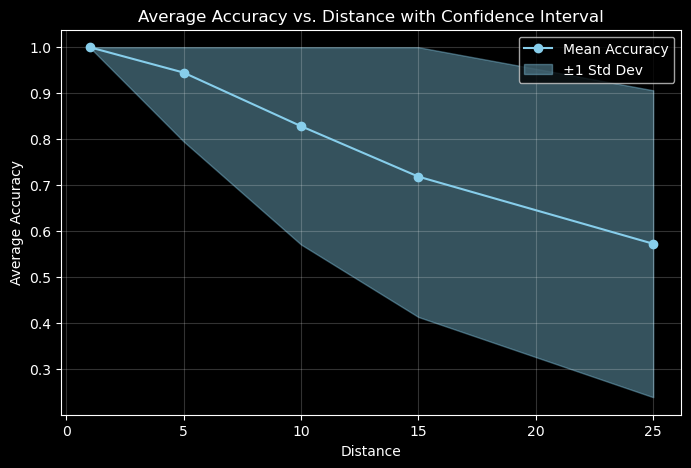

In [35]:
key = "Acc"
x = [1, 5, 10, 15, 25]
values = df.loc[:, [f"{key}{i}" for i in x]]

# Calculate mean and standard deviation
averages = values.mean()
std_devs = values.std()

y = averages.values
y_upper = np.minimum(y + std_devs.values, 1.0)
y_lower = y - std_devs.values

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='o', linestyle='-', label='Mean Accuracy', color="skyblue")
plt.fill_between(x, y_lower, y_upper, color='skyblue', alpha=0.4, label='±1 Std Dev')
plt.xlabel('Distance')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy vs. Distance with Confidence Interval')
plt.legend()
plt.grid(True, alpha=.2)

The plot above doesn't take probabilities into consideration. Below is the fixed plot:

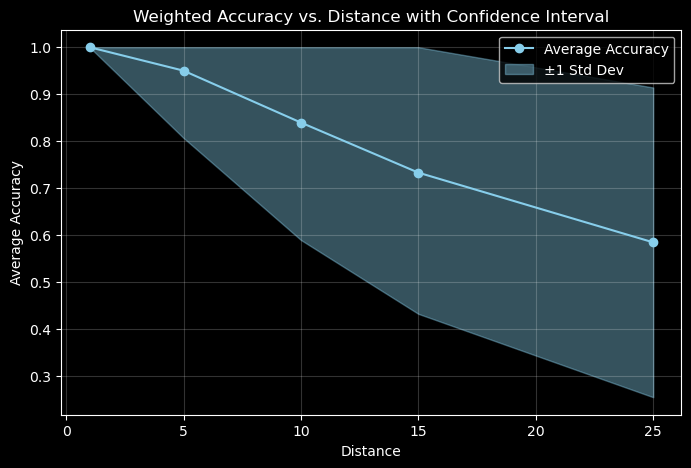

In [34]:
key = "Acc"
x = [1, 5, 10, 15, 25]
values = df.loc[:, [f"{key}{i}" for i in x]]
weights = df["P"].values  # Get the probabilities

# Weighted average
weighted_avg = np.average(values, axis=0, weights=weights)

# Weighted std deviation
def weighted_std(values, weights):
    average = np.average(values, axis=0, weights=weights)
    variance = np.average((values - average)**2, axis=0, weights=weights)
    return np.sqrt(variance)

weighted_std_dev = weighted_std(values.values, weights)

y = weighted_avg
y_upper = np.minimum(y + weighted_std_dev, 1.0)
y_lower = y - weighted_std_dev

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='o', linestyle='-', label='Average Accuracy', color="skyblue")
plt.fill_between(x, y_lower, y_upper, color='skyblue', alpha=0.4, label='±1 Std Dev')
plt.xlabel('Distance')
plt.ylabel('Average Accuracy')
plt.title('Weighted Accuracy vs. Distance with Confidence Interval')
plt.legend()
plt.grid(True, alpha=.2)


Box-plot unfortunately doesn't support weights. But this is not a huge deal since weighting by probabilities didn't make a huge difference above.

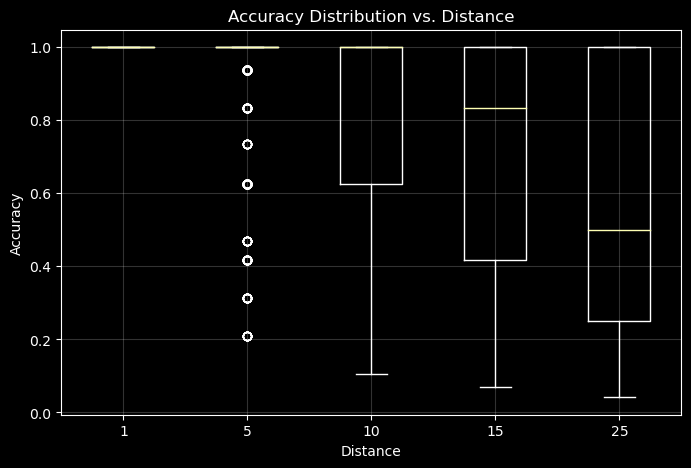

In [33]:
import matplotlib.pyplot as plt

key = "Acc"
x = [1, 5, 10, 15, 25]
data = [df[f"{key}{i}"] for i in x]  # List of series for each distance

# Plotting
plt.figure(figsize=(8, 5))
plt.boxplot(data, positions=range(len(x)))  # Create boxplots at specific positions
plt.xticks(ticks=range(len(x)), labels=x)   # Label x-axis with distance values
plt.xlabel('Distance')
plt.ylabel('Accuracy')
plt.title('Accuracy Distribution vs. Distance')
plt.grid(True, alpha=.2)

# Average DPS

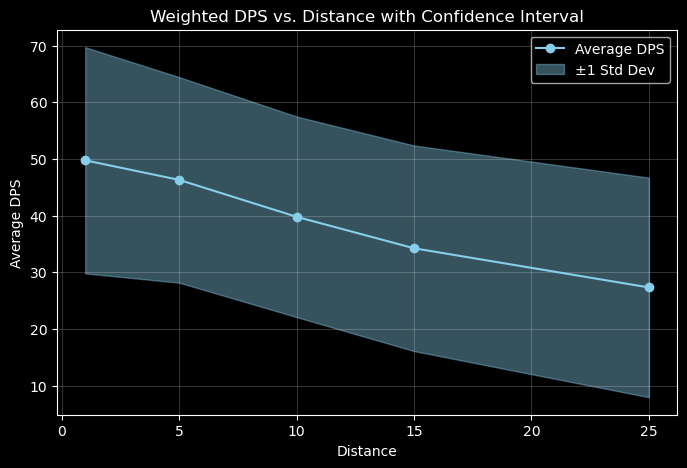

In [31]:
key = "DPS"
x = [1, 5, 10, 15, 25]
values = df.loc[:, [f"{key}{i}" for i in x]]
weights = df["P"].values  # Get the probabilities

# Weighted average
weighted_avg = np.average(values, axis=0, weights=weights)

# Weighted std deviation
def weighted_std(values, weights):
    average = np.average(values, axis=0, weights=weights)
    variance = np.average((values - average)**2, axis=0, weights=weights)
    return np.sqrt(variance)

weighted_std_dev = weighted_std(values.values, weights)

y = weighted_avg
y_upper = y + weighted_std_dev
y_lower = y - weighted_std_dev

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='o', linestyle='-', label='Average DPS', color="skyblue")
plt.fill_between(x, y_lower, y_upper, color='skyblue', alpha=0.4, label='±1 Std Dev')
plt.xlabel('Distance')
plt.ylabel('Average DPS')
plt.title('Weighted DPS vs. Distance with Confidence Interval')
plt.legend()
plt.grid(True, alpha=.2)


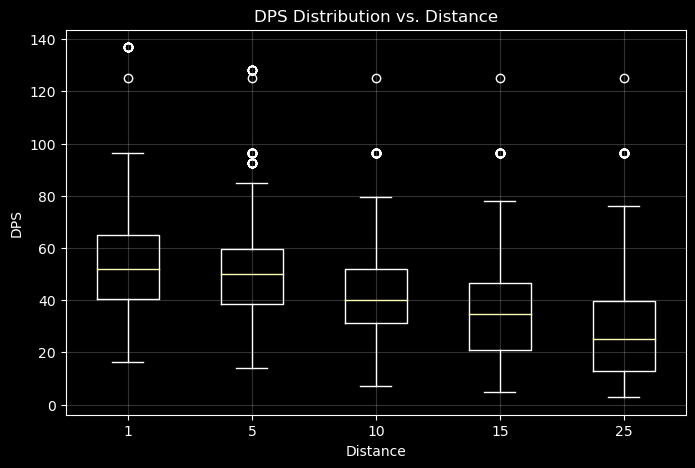

In [32]:
import matplotlib.pyplot as plt

key = "DPS"
x = [1, 5, 10, 15, 25]
data = [df[f"{key}{i}"] for i in x]  # List of series for each distance

# Plotting
plt.figure(figsize=(8, 5))
plt.boxplot(data, positions=range(len(x)))  # Create boxplots at specific positions
plt.xticks(ticks=range(len(x)), labels=x)   # Label x-axis with distance values
plt.xlabel('Distance')
plt.ylabel('DPS')
plt.title('DPS Distribution vs. Distance')
plt.grid(True, alpha=.2)